In [62]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import datetime

In [63]:
start = datetime.datetime(1990, 2, 1)
end = datetime.datetime(2021, 12, 31)

In [64]:
leadingIndicator = pd.read_csv('./leadingIndicator.csv')  # monthly 지표
leadingIndicator = leadingIndicator.set_index('DATE')
leadingIndicator.index = pd.to_datetime(leadingIndicator.index)

vix = web.DataReader('VIXCLS', 'fred', start, end)
vix = vix.resample('M').last()

gdp_growth = web.DataReader('NAEXKP04USQ657S', 'fred', start, end)  # 분기별 실질 GDP 성장률
gdp_growth_monthly = gdp_growth.resample('M').ffill(limit=3)  # 분기 데이터를 월별로 전달

In [65]:
# indicator & vix & gdp 합치기
data = pd.concat([leadingIndicator, vix, gdp_growth_monthly], axis=1, join='inner')
data.columns = ['indicator', 'vix', 'gdp']
data = data['2003-01-01':]
data

,indicator,vix,gdp
DATE,,,
2003-01-31,98.024932,31.17,0.732600
2003-02-28,97.994586,29.63,0.732600
2003-03-31,98.026892,29.15,0.732600
2003-04-30,98.146137,21.21,1.949934
2003-05-31,98.346977,19.47,1.949934
...,...,...,...
2021-06-30,101.172892,15.83,0.921680
2021-07-31,101.129863,18.24,-0.563895
2021-08-31,101.067557,16.48,-0.563895


In [66]:
# leading indicator 01

# 데이터 불러오기
data_eco = web.DataReader('USALOLITONOSTSAM', 'fred', start='2000-01-01', end='2022-12-31')
data_eco = data_eco.ffill()

# 이동평균 계산
data_eco['mean'] = data_eco['USALOLITONOSTSAM'].mean()
data_eco['Trend'] = '상승'
data_eco.loc[data_eco['USALOLITONOSTSAM'] < data_eco['mean'], 'Trend'] = '하락'

# 월별 데이터로 리샘플링 및 마지막 날짜 선택
data_eco = data_eco.resample('M').last()

# 상승 및 하락에 따라 데이터 분리
eco_up = data_eco[data_eco['Trend'] == '상승'].index
eco_down = data_eco[data_eco['Trend'] == '하락'].index

# 리스트
eco_up = (data_eco[data_eco['Trend'] == '상승'].index + pd.DateOffset(months=1)).strftime('%Y-%m').tolist()
eco_down = (data_eco[data_eco['Trend'] == '하락'].index + pd.DateOffset(months=1)).strftime('%Y-%m').tolist()

In [67]:
# VIX 01

# 데이터 불러오기
new_data = web.DataReader('VIXCLS', 'fred', start='1999-01-01', end='2022-12-31')
new_data = new_data.ffill()

# 이동평균 계산
new_data['MA_240'] = new_data['VIXCLS'].rolling(window=20).mean()
new_data['Trend'] = '상승'
new_data.loc[new_data['VIXCLS'] < new_data['MA_240'], 'Trend'] = '하락'

# 월별 데이터로 리샘플링 및 마지막 날짜 선택
new_data = new_data.resample('M').last()['2000-01-31':]

# 상승 및 하락에 따라 데이터 분리
df_up = new_data[new_data['Trend'] == '상승'].index
df_down = new_data[new_data['Trend'] == '하락'].index

# 리스트
df_up = (new_data[new_data['Trend'] == '상승'].index + pd.DateOffset(months=1)).strftime('%Y-%m').tolist()
df_down = (new_data[new_data['Trend'] == '하락'].index + pd.DateOffset(months=1)).strftime('%Y-%m').tolist()

In [68]:
print('평균 이상인 구간 :', eco_up)
print('평균 이하인 구간 :', eco_down)
print('상승 중인 구간 :', df_up)
print('하락 중인 구간 :', df_down)

평균 이상인 구간 : ['2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2012-03', '2012-04', '2012-05', '2012-06', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10

In [69]:
data

,indicator,vix,gdp
DATE,,,
2003-01-31,98.024932,31.17,0.732600
2003-02-28,97.994586,29.63,0.732600
2003-03-31,98.026892,29.15,0.732600
2003-04-30,98.146137,21.21,1.949934
2003-05-31,98.346977,19.47,1.949934
...,...,...,...
2021-06-30,101.172892,15.83,0.921680
2021-07-31,101.129863,18.24,-0.563895
2021-08-31,101.067557,16.48,-0.563895


In [70]:
# leading indicator 02
indicator_mean = data['indicator'].mean()

# VIX 02
data['vix_mv'] = new_data['VIXCLS'].rolling(window=20).mean()
data['vix_mv'] = data['vix_mv'].fillna(method='bfill')

C:\Users\Yoojiyoung\AppData\Local\Temp\ipykernel_15600\1753010169.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['vix_mv'] = data['vix_mv'].fillna(method='bfill')


In [71]:
# # regime 정의 01
# all_period = sorted(list(set(eco_up + eco_down + df_up + df_down)))

# recovery = []
# expansion = []
# slowdown = []
# contraction = []

# for i in all_period:
#     if i in eco_down and i in df_down:
#         # i = pd.datetime(i, format = '%Y-%m')
#         recovery.append(i)
#     if i in eco_up and i in df_down:
#         expansion.append(i)
#     if i in eco_up and i in df_up:
#         slowdown.append(i)
#     if i in eco_down and i in df_up:
#         contraction.append(i)

In [72]:
data

,indicator,vix,gdp,vix_mv
DATE,,,,
2003-01-31,98.024932,31.17,0.732600,26.4445
2003-02-28,97.994586,29.63,0.732600,26.9730
2003-03-31,98.026892,29.15,0.732600,27.3495
2003-04-30,98.146137,21.21,1.949934,27.1640
2003-05-31,98.346977,19.47,1.949934,26.5410
...,...,...,...,...
2021-06-30,101.172892,15.83,0.921680,26.0600
2021-07-31,101.129863,18.24,-0.563895,26.3410
2021-08-31,101.067557,16.48,-0.563895,26.4760


In [73]:
# regime 정의 02
conditions = [
    (data['indicator'] < indicator_mean) & (data['vix'] < data['vix_mv']),
    (data['indicator'] >= indicator_mean) & (data['vix'] < data['vix_mv']),
    (data['indicator'] >= indicator_mean) & (data['vix'] >= data['vix_mv']),
    (data['indicator'] < indicator_mean) & (data['vix'] >= data['vix_mv'])
]

choices = ['Recovery', 'Expansion', 'Slowdown', 'Contraction']
data['regime'] = np.select(conditions, choices)

data

,indicator,vix,gdp,vix_mv,regime
DATE,,,,,
2003-01-31,98.024932,31.17,0.732600,26.4445,Contraction
2003-02-28,97.994586,29.63,0.732600,26.9730,Contraction
2003-03-31,98.026892,29.15,0.732600,27.3495,Contraction
2003-04-30,98.146137,21.21,1.949934,27.1640,Recovery
2003-05-31,98.346977,19.47,1.949934,26.5410,Recovery
...,...,...,...,...,...
2021-06-30,101.172892,15.83,0.921680,26.0600,Expansion
2021-07-31,101.129863,18.24,-0.563895,26.3410,Expansion
2021-08-31,101.067557,16.48,-0.563895,26.4760,Expansion


In [74]:
# print('recovery =', recovery)
# print('expansion =', expansion)
# print('slowdown =', slowdown)
# print('contraction =', contraction)

In [75]:
data.index

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31',
               ...
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31'],
              dtype='datetime64[ns]', name='DATE', length=226, freq='M')

In [76]:
# data.index = data.index.strftime('%Y-%m')

# # data에 regime 컬럼 추가
# data['regime'] = 'Unknown'

# # 각 국면에 따라 'regime' 값 설정
# data.loc[data.index.isin(recovery), 'regime'] = 'Recovery'
# data.loc[data.index.isin(expansion), 'regime'] = 'Expansion'
# data.loc[data.index.isin(slowdown), 'regime'] = 'Slowdown'
# data.loc[data.index.isin(contraction), 'regime'] = 'Contraction'

# data

In [77]:
data['regime'].unique()

array(['Contraction', 'Recovery', 'Expansion', 'Slowdown'], dtype=object)

In [78]:
# # 국면별 색깔 지정
# color_map = {
#     'Recovery': '#1f77b4',  # blue
#     'Expansion': '#ff7f0e',  # orange
#     'Slowdown': '#d62728',   # red
#     'Contraction': '#2ca02c',  # green
# }

# # 그래프 크기 지정\
# fig, ax = plt.subplots(figsize=(15, 8))

# # gdp 그래프 시각화
# ax.plot(data.index, data['gdp'], color='black', linewidth=2, label='US Real GDP Growth y/y %')

# # 국면별 배경색 정의
# def add_colored_spans(ax, periods, color, label):
#     for start, end in periods:
#         ax.axvspan(mdates.datestr2num(start), mdates.datestr2num(end), color=color, alpha=0.5, label=label)

# add_colored_spans(ax, recovery, color_map['Recovery'], 'Recovery')
# add_colored_spans(ax, expansion, color_map['Expansion'], 'Expansion')
# add_colored_spans(ax, slowdown, color_map['Slowdown'], 'Slowdown')
# add_colored_spans(ax, contraction, color_map['Contraction'], 'Contraction')

# # x축 눈금 표시 설정
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# # x축에 있는 날짜 레이블 자동 포맷(레이블이 서로 겹치는 것을 방지)
# fig.autofmt_xdate()

# # 범례 설정
# handles, labels = ax.get_legend_handles_labels() # 현재 축(ax)에 추가된 모든 범례 항목의 핸들(범례에 해당하는 마커나 라인 객체)과 레이블(범례의 텍스트)을 리스트로 반환
# by_label = dict(zip(labels, handles))  # 중복 값 처리
# legend_elements = [Patch(facecolor=color, label=label) for label, color in color_map.items()] # 각 국면과 해당 색상을 튜플로 반환
# ax.legend(handles=legend_elements, loc='lower left') # 범례 추가 및 위치 설정

# plt.show()

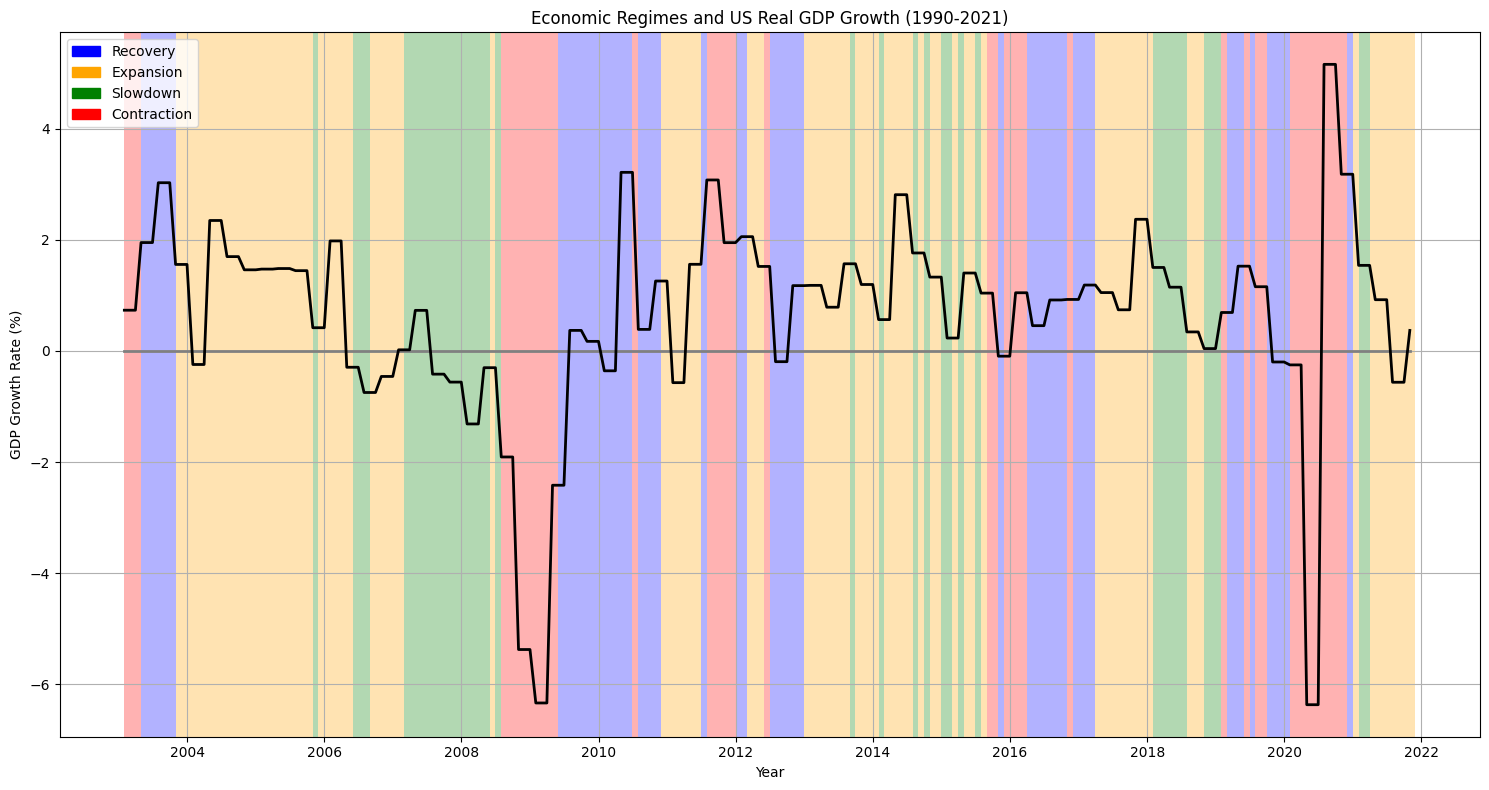

In [79]:
# 그래프를 그리기 위한 설정
plt.figure(figsize=(15, 8))
ax = plt.gca()

# 각 국면별 배경색 설정
background_colors = {
    'Recovery': 'blue',
    'Expansion': 'orange',
    'Slowdown': 'green',
    'Contraction': 'red'
}

# 범례를 위한 패치 리스트 생성
legend_patches = [Patch(color=color, label=regime) for regime, color in background_colors.items()]

# 국면이 바뀌는 지점을 찾습니다.
regime_changes = data['regime'].ne(data['regime'].shift()).cumsum()

# 각 국면에 대해 배경색을 칠합니다.
prev_end = None
for (regime, group_data) in data.groupby(regime_changes):
    start = prev_end if prev_end else group_data.index[0]
    end = group_data.index[-1] + pd.offsets.MonthEnd(1)  # 월말로 설정하여 겹치게 함
    prev_end = end
    ax.axvspan(start, end, facecolor=background_colors[group_data['regime'].iloc[0]], alpha=0.3, lw=0)

# y=0 선 그래프 그리기
ax.plot(data.index, np.zeros_like(data['gdp']), color='gray', linewidth=2)

# 실질 GDP 성장률 선 그래프 그리기
ax.plot(data.index, data['gdp'], color='black', linewidth=2, label='US Real GDP Growth y/y %')

# y 축 레이블 설정
plt.ylabel('GDP Growth Rate (%)')

# 그래프 제목 및 레이블 설정
plt.title('Economic Regimes and US Real GDP Growth (1990-2021)')
plt.xlabel('Year')

# 범례 표시
plt.legend(handles=legend_patches)

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
data

,indicator,vix,gdp,vix_mv,regime
DATE,,,,,
2003-01-31,98.024932,31.17,0.732600,26.4445,Contraction
2003-02-28,97.994586,29.63,0.732600,26.9730,Contraction
2003-03-31,98.026892,29.15,0.732600,27.3495,Contraction
2003-04-30,98.146137,21.21,1.949934,27.1640,Recovery
2003-05-31,98.346977,19.47,1.949934,26.5410,Recovery
...,...,...,...,...,...
2021-06-30,101.172892,15.83,0.921680,26.0600,Expansion
2021-07-31,101.129863,18.24,-0.563895,26.3410,Expansion
2021-08-31,101.067557,16.48,-0.563895,26.4760,Expansion


In [81]:
# 국면 리스트 생성
recovery_lst = []
expansion_lst = []
slowdown_lst = []
contraction_lst = []

for idx, value in enumerate(data['regime']):
    if value == 'Recovery':
        recovery_lst.append(data.index[idx])
    if value == 'Expansion':
        expansion_lst.append(data.index[idx])
    if value == 'Slowdown':
        slowdown_lst.append(data.index[idx])
    if value == 'Contraction':
        contraction_lst.append(data.index[idx])

# 출력
print('Recovery 기간 :', recovery_lst)
print('Expansion 기간 :', expansion_lst)
print('Slowdown 기간 :', slowdown_lst)
print('Contraction 기간 :', contraction_lst)

Recovery 기간 : [Timestamp('2003-04-30 00:00:00'), Timestamp('2003-05-31 00:00:00'), Timestamp('2003-06-30 00:00:00'), Timestamp('2003-07-31 00:00:00'), Timestamp('2003-08-31 00:00:00'), Timestamp('2003-09-30 00:00:00'), Timestamp('2009-05-31 00:00:00'), Timestamp('2009-06-30 00:00:00'), Timestamp('2009-07-31 00:00:00'), Timestamp('2009-08-31 00:00:00'), Timestamp('2009-09-30 00:00:00'), Timestamp('2009-10-31 00:00:00'), Timestamp('2009-11-30 00:00:00'), Timestamp('2009-12-31 00:00:00'), Timestamp('2010-01-31 00:00:00'), Timestamp('2010-02-28 00:00:00'), Timestamp('2010-03-31 00:00:00'), Timestamp('2010-04-30 00:00:00'), Timestamp('2010-05-31 00:00:00'), Timestamp('2010-07-31 00:00:00'), Timestamp('2010-08-31 00:00:00'), Timestamp('2010-09-30 00:00:00'), Timestamp('2010-10-31 00:00:00'), Timestamp('2011-06-30 00:00:00'), Timestamp('2011-12-31 00:00:00'), Timestamp('2012-01-31 00:00:00'), Timestamp('2012-06-30 00:00:00'), Timestamp('2012-07-31 00:00:00'), Timestamp('2012-08-31 00:00:00'),

In [82]:
# 리스트 형식 변경 'YYYY-MM'
def format_dates(date_list):
    return [date.strftime('%Y-%m') for date in date_list]

# Convert the lists
recovery_lst = format_dates(recovery_lst)
expansion_lst = format_dates(expansion_lst)
slowdown_lst = format_dates(slowdown_lst)
contraction_lst = format_dates(contraction_lst)

# 출력
print('Recovery 기간 :', recovery_lst)
print('Expansion 기간 :', expansion_lst)
print('Slowdown 기간 :', slowdown_lst)
print('Contraction 기간 :', contraction_lst)

Recovery 기간 : ['2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-07', '2010-08', '2010-09', '2010-10', '2011-06', '2011-12', '2012-01', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2015-10', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-11', '2016-12', '2017-01', '2017-02', '2019-02', '2019-03', '2019-04', '2019-06', '2019-09', '2019-10', '2019-11', '2019-12', '2020-11']
Expansion 기간 : ['2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09', '2005-11', '2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '